In [1]:
# Import libraries necessary for this project
import numpy as np # working with arrays
import pandas as pd # data processing
from sklearn.tree import DecisionTreeClassifier # tree algorithm
from sklearn.metrics import accuracy_score # model precision
from sklearn.model_selection import train_test_split # splitting the data
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from sklearn.tree import plot_tree # tree diagram

In [2]:
# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
full_data.head()
full_data.dropna(inplace=True)

In [3]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data[['Age','Sex','Pclass']]

# Show the new dataset with 'Survived' removed
data.head()

,Age,Sex,Pclass
1,38.0,female,1
3,35.0,female,1
6,54.0,male,1
10,4.0,female,3
11,58.0,female,1


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


###  Data Processing
We can see that attributes like Sex, Cabin, and Embarked  are categorical and object type in nature. The decision tree algorithm in scikit-learn does not support X variables to be ‘object’ type in nature. So, it is necessary to convert these ‘object’ values into ‘binary’ values.

In [5]:
for i in data['Sex']:
    if i  == 'Male':
        data.iloc[:,1].replace(i, 0, inplace = True)
    else:
        data.iloc[:,1].replace(i, 1, inplace = True)

In [6]:
#Split the data into testing and training data using train test split
X_train, X_test, y_train, y_test = train_test_split(data, outcomes, test_size=0.33,random_state=42)

#Create the LinearRegression model and assign it to the variable model.
model = DecisionTreeClassifier()

#Fit the model to the training data.
model.fit(X_train,y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y_test, y_pred)
print(f'The accuracy of this model is {acc}')

The accuracy of this model is 0.7049180327868853


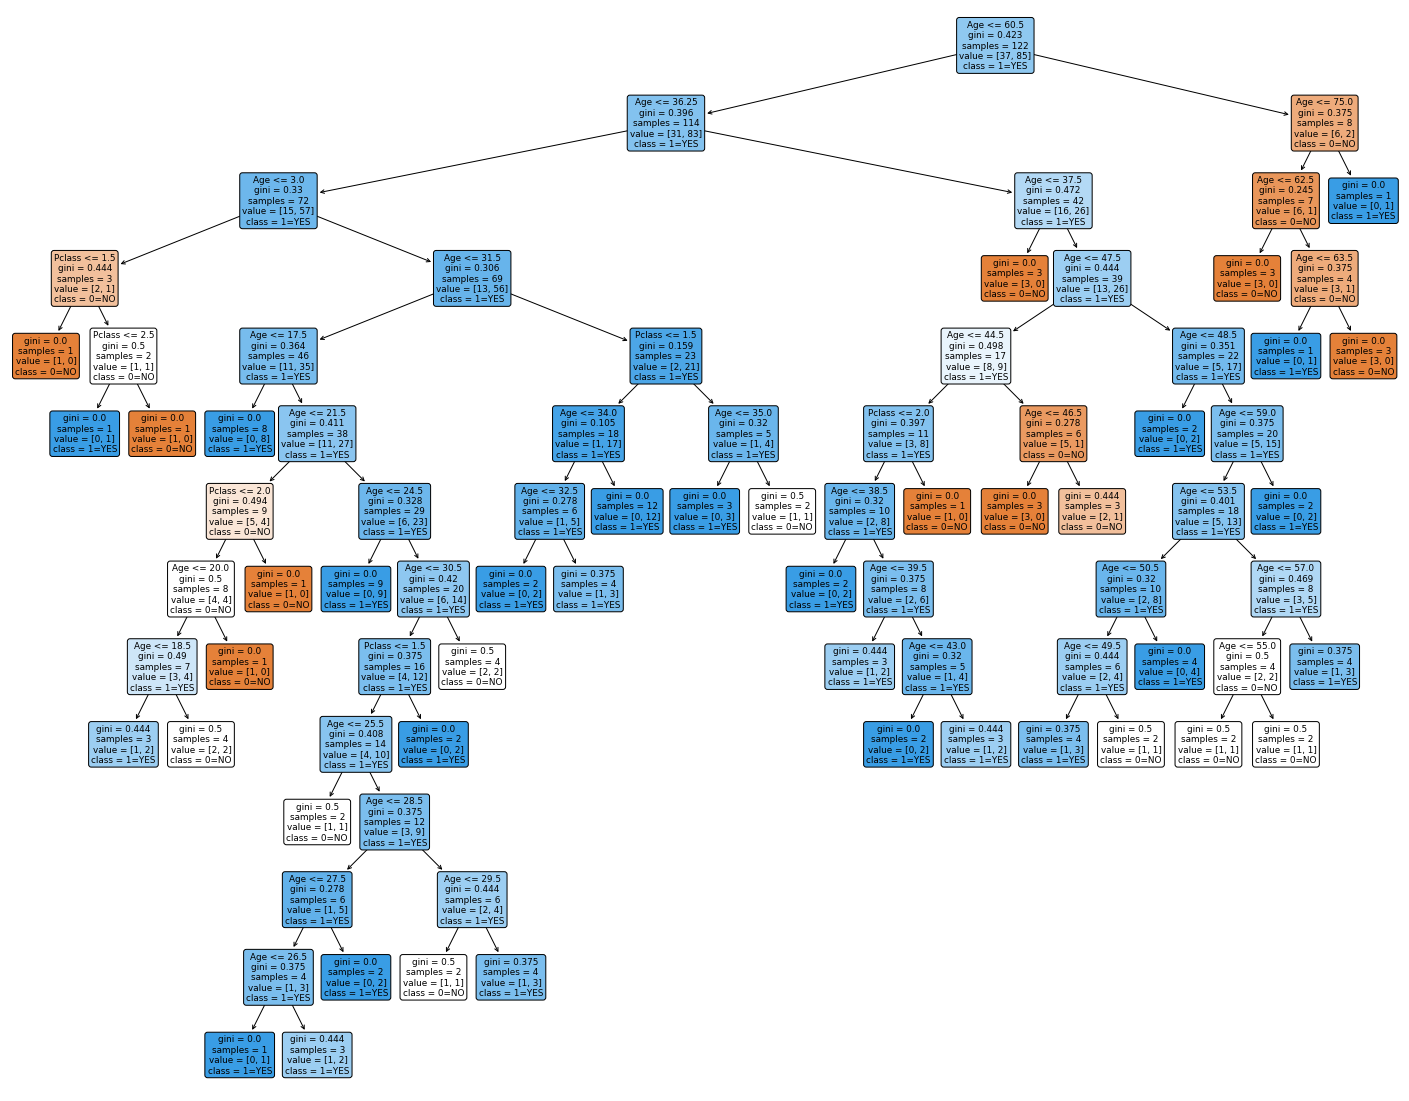

In [7]:
#Visualization of the decision tree
rcParams['figure.figsize'] = (25, 20)
feature_names = data.columns
target_names = ['0=NO','1=YES']

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png')